In [2]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import time

import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
sys.path.append(os.path.join(os.environ['REPO_DIR'], 'cells'))
from utilities2015 import *
from data_manager import *
from metadata import *
from cell_utilities import *
from learning_utilities import *
from distributed_utilities import download_from_s3

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Setting environment for AWS compute node


No vtk


In [3]:
n_radial = 4
# radial_bins = np.logspace(0, 2, 10, base=10)
radial_bins = np.linspace(0, 100, n_radial+1)

n_angular = 8
angular_bins = np.linspace(-np.pi, np.pi, n_angular+1)

n_orientation_bins = 10
orientation_bins = np.linspace(-np.pi/2, np.pi/2, n_orientation_bins+1)

size_histogram_bins = np.r_[np.linspace(0, 3000, 10), np.inf]

n_edge_length_bins = 10
edge_length_bins = np.r_[np.linspace(0, 100, n_edge_length_bins), np.inf]

n_edge_direction_bins = 10
edge_direction_bins = np.linspace(-np.pi/2, np.pi/2, n_edge_direction_bins+1)

In [4]:
stack = 'MD589'

In [5]:
sec = 200

# Show whole image with patch bounding boxes

In [7]:
# patch_size = 224
# half_size = patch_size/2
# patch_spacing = 56

# im = patch_boxes_overlay_on(bg='original', downscale_factor=1, locs=locations, patch_size=patch_size, stack=stack, sec=sec)
# display_image(im)

# Single Cell Descriptors

In [8]:
load_cell_data(what='blobCentroids',stack=stack,sec=sec,ext='bp')
# load_cell_data(what='cellSizes',stack=stack, sec=sec, ext='bp')

array([[  4.98168750e+03,   3.62500000e+00],
       [  3.24968085e+03,   4.42553191e+00],
       [  8.15666667e+02,   6.20833333e+00],
       ..., 
       [  1.50697419e+04,   1.19186774e+04],
       [  1.53260625e+04,   1.19227917e+04],
       [  1.54437059e+04,   1.19281176e+04]])

In [9]:
# cell_sizes = load_cell_data('cellSizes', stack=stack, sec=sec, ext='bp')

cell_orientations = load_cell_data('orientation', stack, sec)
cell_orientations = np.array(map(normalize_angle, cell_orientations))

cell_centroids = load_cell_data('centroid', stack, sec)
cell_numbers = cell_centroids.shape[0]

In [10]:
# For visualization 
cell_contours = load_cell_data('contours', stack=stack, sec=sec)# Position of the contour boundary in local coordinate
n_cells = len(cell_contours)

cell_mask_centers = load_cell_data('mask_center', stack=stack, sec=sec,ext='hdf')
cell_contours_global = {i: cell_centroids[i].astype(np.int) - cell_mask_centers[i] + cell_contours[i]
                        for i in range(cell_numbers)}

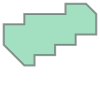

In [34]:
from shapely.geometry import Polygon
Polygon(cell_contours_global[0])

In [42]:
cell_coordinate_global = load_cell_data('contours_global', stack=stack, sec=sec)
cell_coords = load_cell_data('coords', stack=stack, sec=sec)

rm -rf /shared/CSHL_cells_v2/detected_cells/MD589/MD589-N36-2015.07.30-18.28.52_MD589_2_0107/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_blobCoords.hdf && mkdir -p /shared/CSHL_cells_v2/detected_cells/MD589/MD589-N36-2015.07.30-18.28.52_MD589_2_0107
aws s3 cp s3://mousebrainatlas-data/CSHL_cells_v2/detected_cells/MD589/MD589-N36-2015.07.30-18.28.52_MD589_2_0107/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_blobCoords.hdf /shared/CSHL_cells_v2/detected_cells/MD589/MD589-N36-2015.07.30-18.28.52_MD589_2_0107/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_blobCoords.hdf


Child returned 0
Child returned 0
2.51 seconds.


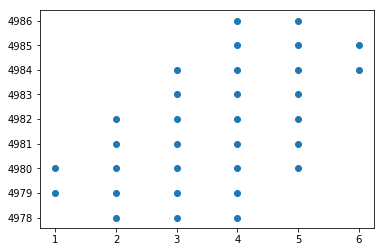

In [49]:
tempBlob0 = cell_coords[0]
plt.scatter(tempBlob0[:,0],tempBlob0[:,1])

# Annotation structure

In [20]:
contour_df, _ = DataManager.load_annotation_v3(stack=stack)
from annotation_utilities import convert_annotation_v3_original_to_aligned_cropped
contour_df = convert_annotation_v3_original_to_aligned_cropped(contour_df, stack)

'No object named structures in the file'


Annotation has no structures.


In [22]:
contour_df.iloc[1]

creator                                                             yuncong
downsample                                                                1
edits                     [{u'username': u'yuncong', u'timestamp': u'091...
flags                                                                     1
id                                                          100179733918340
label_position                               [10809.5686275, 11042.0392157]
name                                                                     IO
orientation                                                        sagittal
parent_structure                                                         []
section                                                                 211
side                                                                      L
side_manually_assigned                                                False
time_created                                                 09152016013448
vertices    

In [23]:
contours = {cnt['name']: cnt['vertices'] for cnt_id, cnt in contour_df[contour_df['section'] == sec].iterrows()}

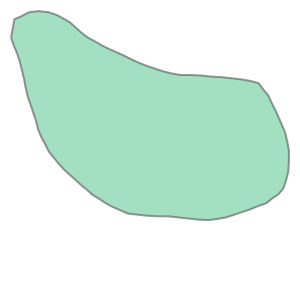

In [24]:
Polygon(contours['SC'])

In [25]:
[cnt['name'] for cnt_id, cnt in contour_df[contour_df['section'] == sec].iterrows()]

['VTA', 'RMC', 'Tz', 'SC', 'RtTg', 'Pn', 'Gr', 'IC', '7n', 'RPC', 'IO']

In [26]:
structure_name = 'SC'
cnt = contours[structure_name]

In [27]:
from matplotlib.path import Path
large_cell_is_inside = Path(cnt.astype(np.int)).contains_points(large_cell_centroids)
large_cell_indices_inside = large_cell_indices[large_cell_is_inside]
large_cell_indices_inside[0]

NameError: name 'large_cell_centroids' is not defined

In [28]:
small_cell_indices = np.array(list(set(range(cell_numbers)) - set(large_cell_indices.tolist())))
small_cell_centroids = cell_centroids[small_cell_indices]
small_cell_is_inside = Path(cnt.astype(np.int)).contains_points(small_cell_centroids)
small_cell_indices_inside = small_cell_indices[small_cell_is_inside]

NameError: name 'large_cell_indices' is not defined

In [29]:
cell_to_watch_global_index = 3971
cell_to_watch_index_among_large = large_cell_indices_list.index(cell_to_watch_global_index)

print np.bincount(angular_indices[cell_to_watch_index_among_large], minlength=len(angular_bins)-1)
print np.bincount(radial_indices[cell_to_watch_index_among_large], minlength=len(radial_bins))

NameError: name 'large_cell_indices_list' is not defined

In [33]:
image = load_cell_data('image', stack=stack, sec=sec)

rm -rf /shared/CSHL_cells_v2/detected_cells/MD589/MD589-N36-2015.07.30-18.28.52_MD589_2_0107/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_image.jpg && mkdir -p /shared/CSHL_cells_v2/detected_cells/MD589/MD589-N36-2015.07.30-18.28.52_MD589_2_0107
aws s3 cp s3://mousebrainatlas-data/CSHL_cells_v2/detected_cells/MD589/MD589-N36-2015.07.30-18.28.52_MD589_2_0107/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_image.jpg /shared/CSHL_cells_v2/detected_cells/MD589/MD589-N36-2015.07.30-18.28.52_MD589_2_0107/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_image.jpg


Child returned 0
Child returned 1
0.42 seconds.


IOError: [Errno 2] No such file or directory: '/shared/CSHL_cells_v2/detected_cells/MD589/MD589-N36-2015.07.30-18.28.52_MD589_2_0107/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_image.jpg'

In [333]:
#############
# Visualize #
#############

viz = image.copy()

# Draw large cell boundaries
for i in large_cell_indices_inside:
    cv2.polylines(viz, [cell_contours_global[i].astype(np.int)], isClosed=True, color=(255,0,0), thickness=1)

# Draw small cell boundaries
for i in small_cell_indices_inside:
    cv2.polylines(viz, [cell_contours_global[i].astype(np.int)], isClosed=True, color=(0,255,0), thickness=1)

# Draw structure boundary
cv2.polylines(viz, [cnt.astype(np.int)], isClosed=True, color=(0,0,255), thickness=1)

# Visualize radial-angular histogram of selected cells
random_large_cell_indices = large_cell_indices_inside
# random_large_cell_indices = large_cell_indices_inside
#     random_large_cell_indices = np.random.choice(large_cell_indices_inside, 2, replace=False)

for source in random_large_cell_indices:

    cv2.circle(viz, tuple(cell_centroids[source].astype(np.int)), 6, color=(255,0,0), thickness=-1)

    neighbor_distances = np.sqrt(np.sum(neighbor_vectors[large_cell_indices_list.index(source)]**2, axis=1))

    c = 0
    for i in np.array(neighbors[large_cell_indices_list.index(source)])[np.argsort(neighbor_distances)]:
#         for i in neighbors[source]:

#         # Draw link to large cells
        if i in large_cell_indices_inside:

            cv2.circle(viz, tuple(cell_centroids[i].astype(np.int)), 3, color=(255,0,0), thickness=-1)

            cv2.line(viz, tuple(cell_centroids[source].astype(np.int)), 
                 tuple(cell_centroids[i].astype(np.int)), 
                 color=(255,0,0), thickness=3)

            c += 1
            if c == 3:
                break

#        # Draw link to small cells
        if i in small_cell_indices_inside:

            cv2.circle(viz, tuple(cell_centroids[i].astype(np.int)), 3, color=(0,255,0), thickness=-1)            

            cv2.line(viz, tuple(cell_centroids[source].astype(np.int)), 
                     tuple(cell_centroids[i].astype(np.int)), 
                     color=(0,0,0), thickness=1)    
    
            
        if source == cell_to_watch_global_index:
            # Draw radial bins
            for rb in radial_bins:
                cv2.circle(viz, tuple(cell_centroids[source].astype(np.int)), 
                          int(rb), color=(0,0,255), thickness=1)

            # Draw angular bins
            for abi, ab in enumerate(angular_bins[:-1]):
                
                near_end = cell_centroids[source].astype(np.int)
                far_end = (cell_centroids[source] + (np.cos(ab - cell_orientations[source])*100, 
                                                     np.sin(ab - cell_orientations[source])*100)).astype(np.int)
                
                cv2.line(viz, tuple(near_end), tuple(far_end),
                 color=(0,0,255), thickness=1)
                cv2.putText(viz, str(abi), tuple((near_end + far_end)/2), cv2.FONT_HERSHEY_DUPLEX, 1, ((0,0,0)), 2)

# Find crop box

margin = 50
roi_xmin, roi_ymin = cnt.astype(np.int).min(axis=0) - margin
roi_xmax, roi_ymax = cnt.astype(np.int).max(axis=0) + margin
print roi_xmin, roi_xmax, roi_ymin, roi_ymax

cropped_viz = viz[roi_ymin:roi_ymax+1, roi_xmin:roi_xmax+1]

2974 7410 686 3682


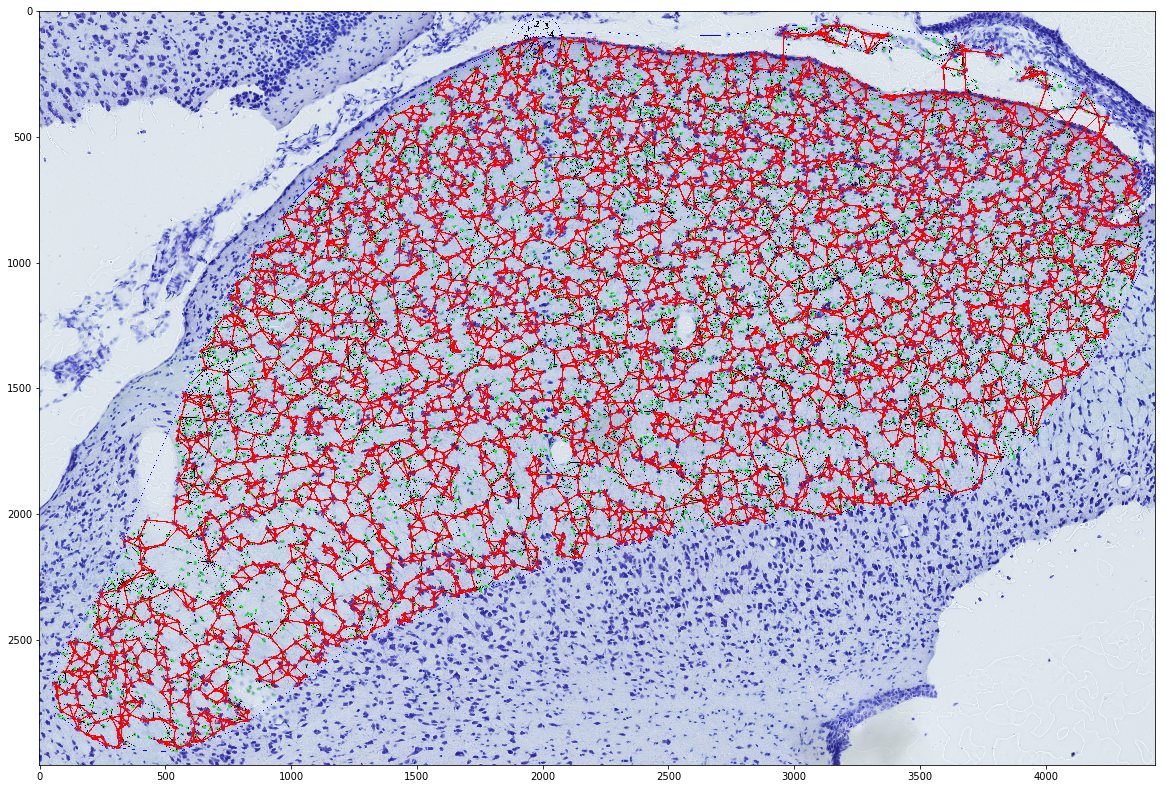

In [334]:
plt.figure(figsize=(20,20));
plt.imshow(cropped_viz);

# Region features

In [13]:
region_features = load_cell_classifier_data(what='region_features', ext='hdf', stack=stack, sec=sec)
region_contours = load_cell_classifier_data(what='region_contours', ext='bp', stack=stack, sec=sec)

rm -rf /shared/CSHL_cells_v2/classifiers/features_per_section/MD589/MD589-N36-2015.07.30-18.28.52_MD589_2_0107/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_region_features.hdf && mkdir -p /shared/CSHL_cells_v2/classifiers/features_per_section/MD589/MD589-N36-2015.07.30-18.28.52_MD589_2_0107
aws s3 cp s3://mousebrainatlas-data/CSHL_cells_v2/classifiers/features_per_section/MD589/MD589-N36-2015.07.30-18.28.52_MD589_2_0107/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_region_features.hdf /shared/CSHL_cells_v2/classifiers/features_per_section/MD589/MD589-N36-2015.07.30-18.28.52_MD589_2_0107/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_region_features.hdf


Child returned 0
Child returned 0
1.41 seconds.


In [14]:
region_contours[-1]

array([[15288, 11704],
       [15288, 11928],
       [15512, 11928],
       [15512, 11704]])

In [15]:
len(region_features)

43695

In [16]:
patch_center_locations

NameError: name 'patch_center_locations' is not defined

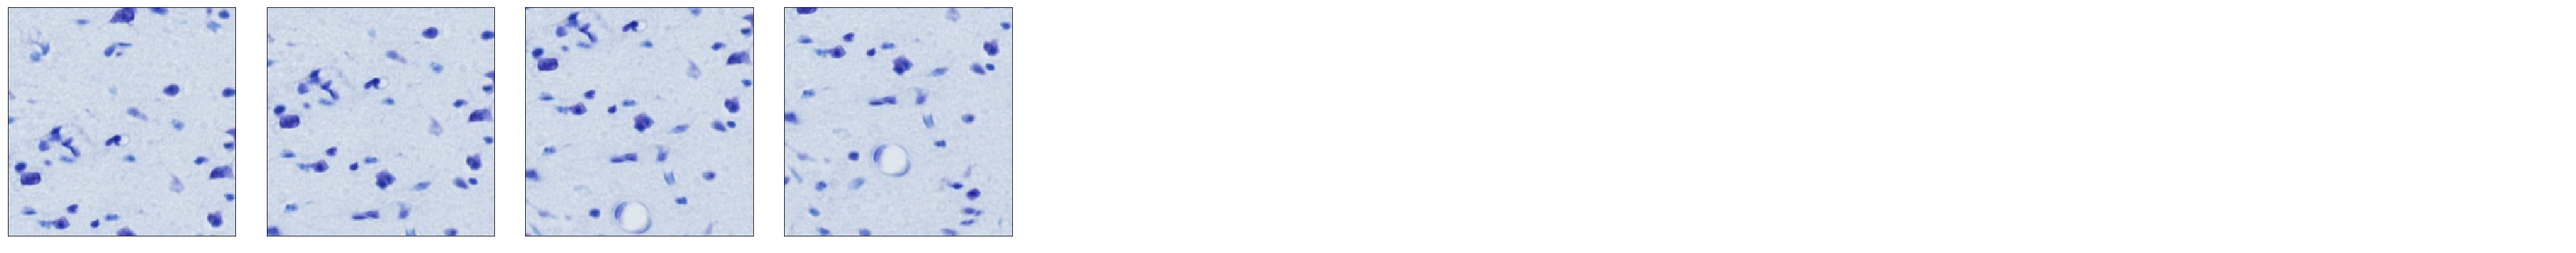

In [214]:
patch_center_locations = [region_contours[index].mean(axis=0).astype(np.int) 
                    for index in [1,2,3,4]]

patch_list = extract_patches_given_locations(stack=stack, sec=sec, locs=patch_center_locations)
display_images_in_grids(patch_list, nc=10)

In [36]:
regions_to_plot = [283, 527, 999, 12421, 283, 527, 999, 12421, 283, 527, 999, 12421]

In [37]:
histograms = [region_features[gi]['allSizeHist'] for gi in regions_to_plot]

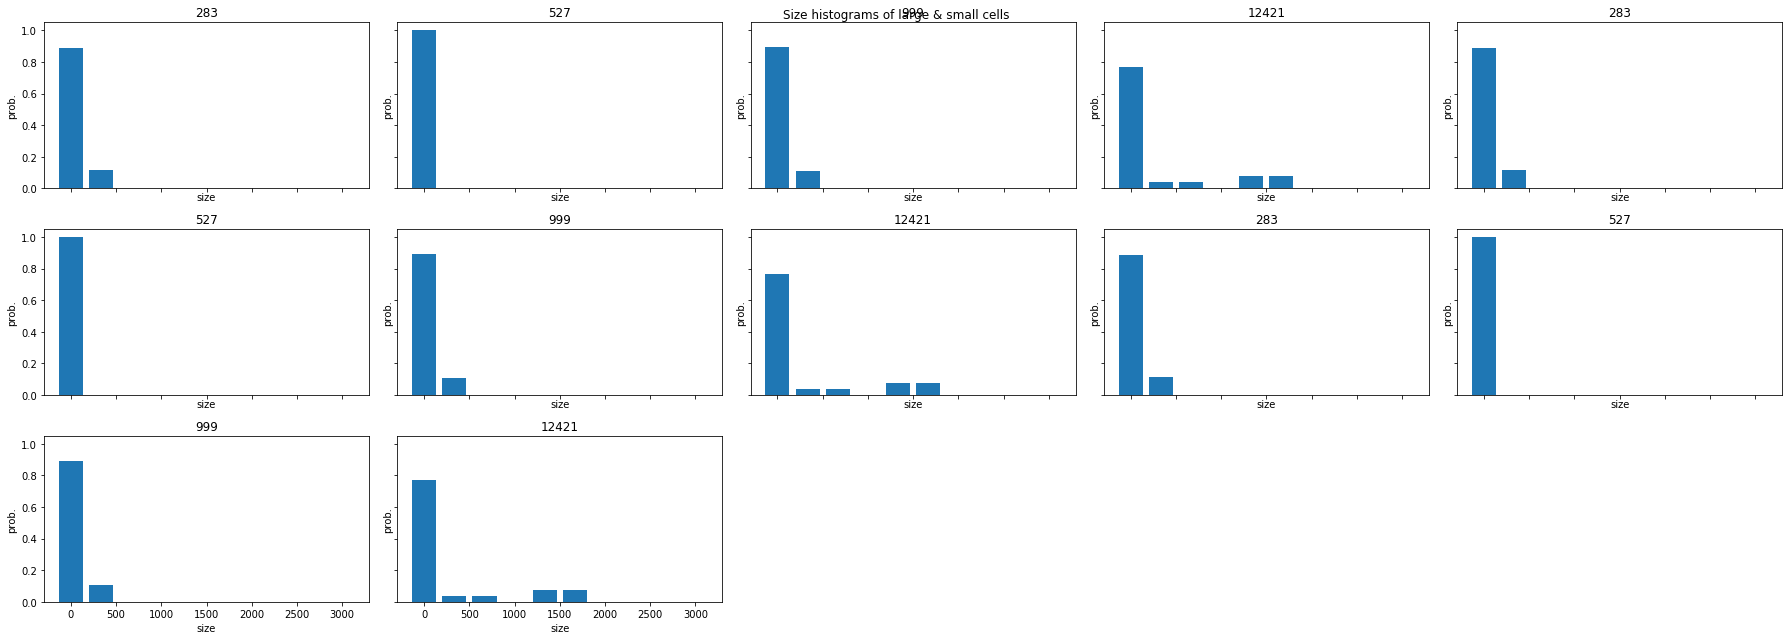

In [38]:
plot_histograms(histograms, bins=size_histogram_bins[:-1], titles=map(str, regions_to_plot), 
                ncols=5,
               xlabel='size', ylabel='prob.', suptitle='Size histograms of large & small cells', cellsize=(5,3));

In [291]:
# for gi in [283, 527, 999, 12421]:
#     plt.figure(figsize=(3,2));
#     plt.bar(range(len(size_histogram_bins))[:-1], region_features[gi]['allSizeHist']);
#     plt.title(str(gi));
#     plt.show();

# Labeling Regions

In [294]:
# contours_df = contour_df

In [295]:
# labeled_contours = contours_df[(contours_df['orientation'] == 'sagittal') & (contours_df['downsample'] == 1)]
# labeled_contours = labeled_contours.drop_duplicates(subset=['section', 'name', 'side', 'filename', 'downsample', 'creator'])
# labeled_contours = convert_annotation_v3_original_to_aligned_cropped(labeled_contours, stack=stack)

In [40]:
margins_to_sample = [500] # (100 um, 250 um)

In [42]:
region_labels = label_regions(stack=stack, section=sec, region_contours=region_contours,
                              surround_margins=margins_to_sample,
                              labeled_contours=contour_df[contour_df['section'] == sec])

Analyzing section 208..


In [147]:
region_size = {regionName : len(region_labels[regionName]) for regionName in region_labels} # number of patches in the section analyzed above
region_size

{'10N': 0,
 '10N_negative': 43196,
 '10N_surround_500_12N': 84,
 '10N_surround_500_noclass': 513,
 '12N': 87,
 '12N_negative': 43109,
 '12N_surround_500_noclass': 621,
 '4N': 0,
 '4N_negative': 43196,
 '4N_surround_500_noclass': 257,
 'IC': 318,
 'IC_negative': 42878,
 'IC_surround_500_SC': 39,
 'IC_surround_500_noclass': 774,
 'Pn': 364,
 'Pn_negative': 42832,
 'Pn_surround_500_noclass': 788,
 'RMC': 142,
 'RMC_negative': 43054,
 'RMC_surround_500_noclass': 664,
 'SC': 2115,
 'SC_negative': 41081,
 'SC_surround_500_IC': 26,
 'SC_surround_500_noclass': 1750,
 'Tz': 95,
 'Tz_negative': 43101,
 'Tz_surround_500_noclass': 778,
 'bg': 208,
 'noclass': 40075}

In [310]:
len(region_size)

29

In [43]:
# Get the location of the center of each grid. grid_to_location[gridIndex] give the pixel position. 
grid_to_location = grid_parameters_to_sample_locations(get_default_gridspec(stack=stack, patch_size=patch_size, stride=patch_spacing))

In [68]:
im = patch_boxes_overlay_on(bg='original', downscale_factor=8, locs=grid_to_location[[0,57539]], patch_size=patch_size,
                      stack=stack, sec=sec)

In [69]:
display_image(im)

/shared/MouseBrainAtlasXiang/cells/tmp.jpg

In [46]:
# Region_contours is the vertex of the region ( little square). Here we get the position of the center of the region
region_centroids = region_contours.mean(axis=1).astype(np.int) 

In [47]:
# This is a dictionary. Given position, give grid index
location_to_grid = {tuple(loc): i for i, loc in enumerate(grid_to_location)}

In [48]:
grid_indices_per_label = {label: [location_to_grid[tuple(c)] for c in region_centroids[region_indices]] 
                          for label, region_indices in region_labels.iteritems()}

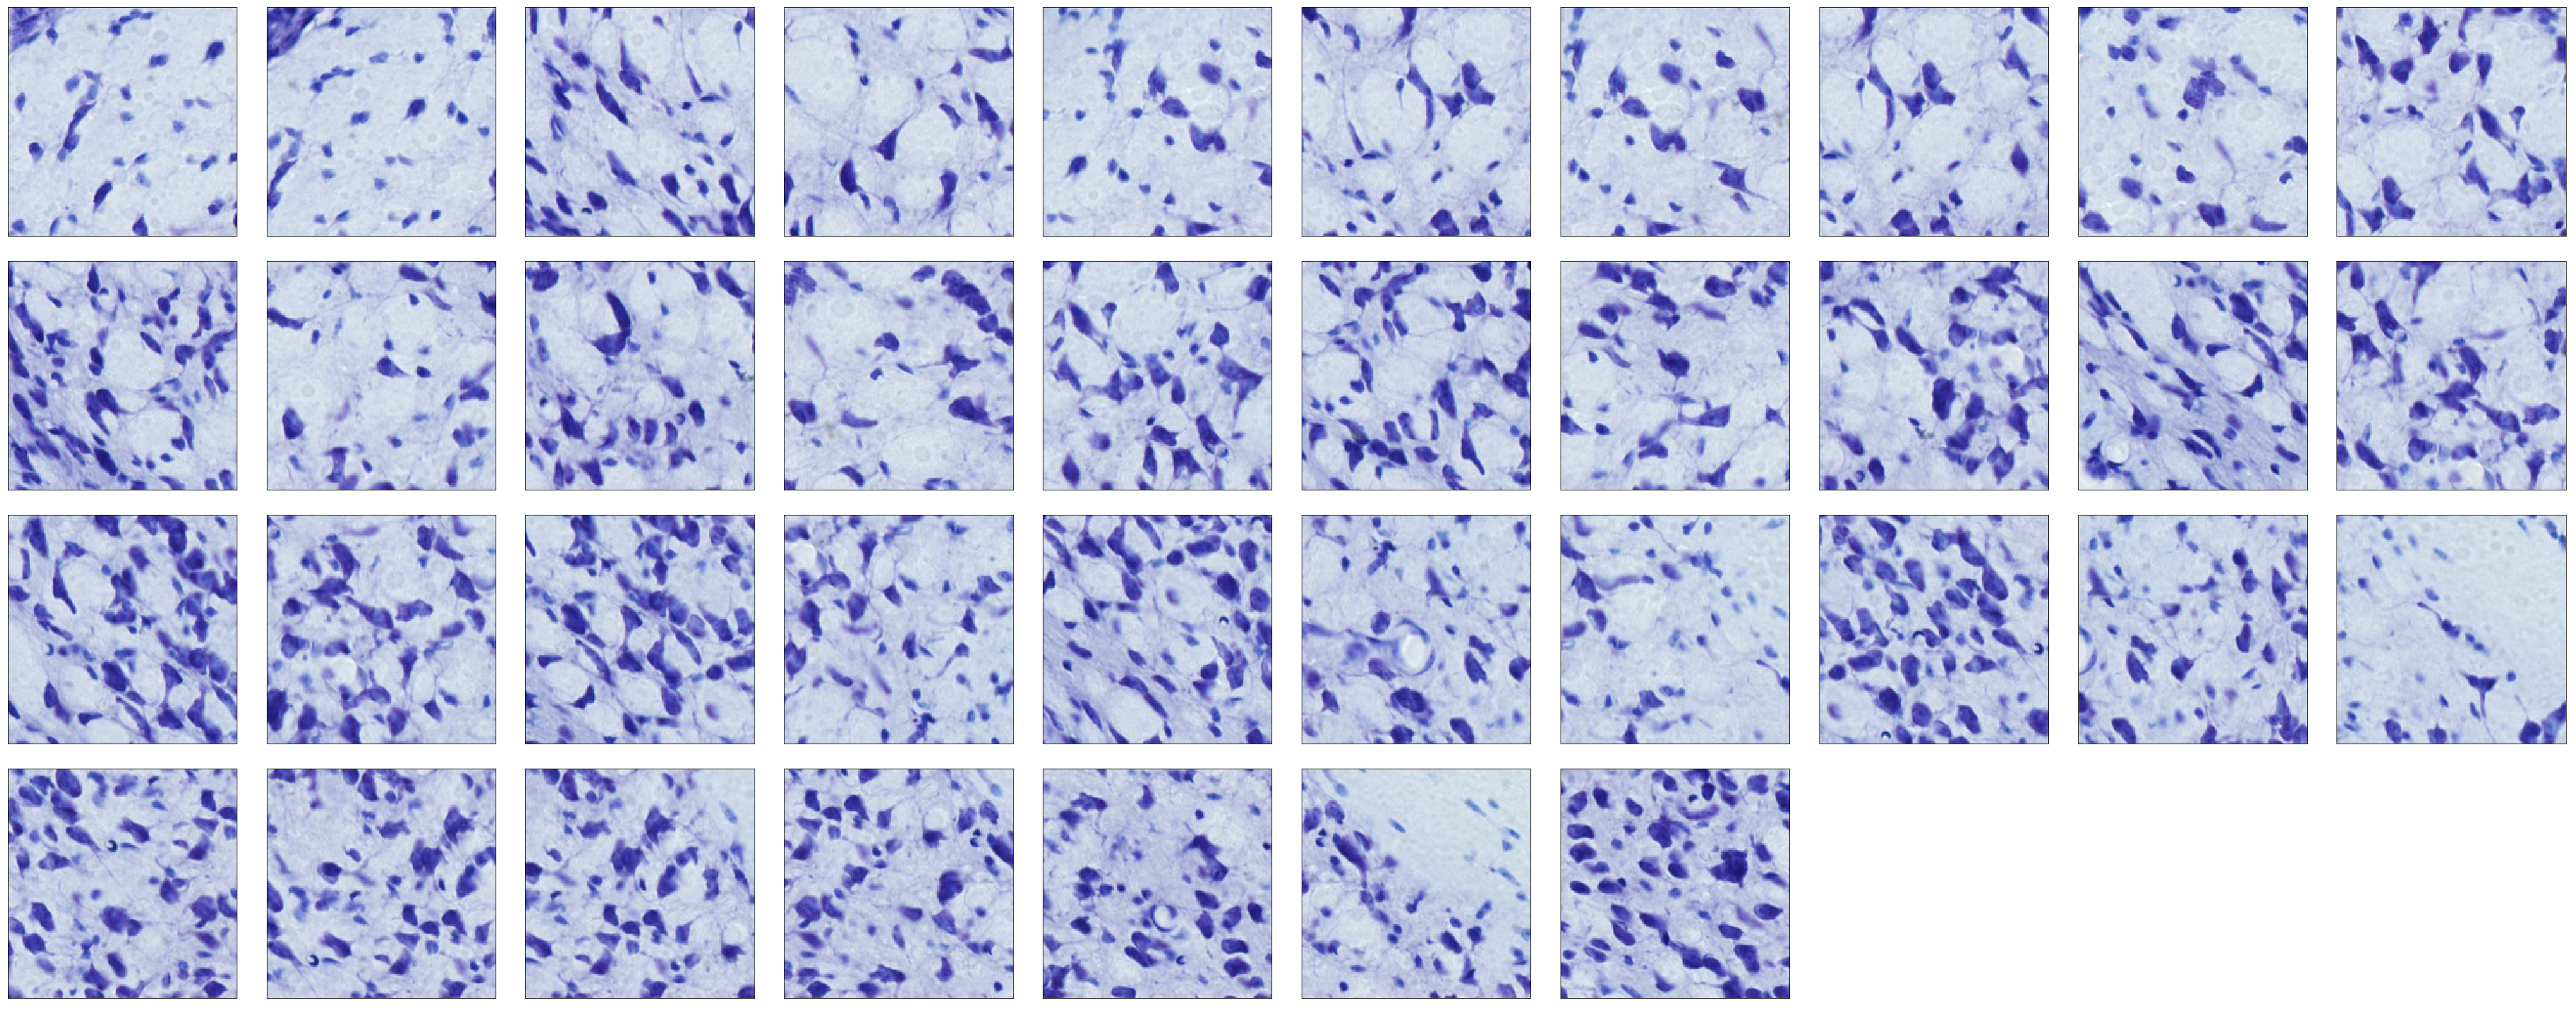

In [280]:
patches = extract_patches_given_locations(stack=stack, sec=sec, indices=grid_indices_per_label['Pn'], version='compressed')
display_images_in_grids(patches[::10], nc=10)

In [282]:
im = patch_boxes_overlay_on(bg='original', downscale_factor=8, 
                            locs=region_centroids[region_labels['Pn'][::20]], 
                            patch_size=patch_size,
                      stack=stack, sec=sec)
display_image(im)

/shared/MouseBrainAtlasXiang/cells/tmp.jpg

In [52]:
training_addresses_by_section = []

    first_sec, last_sec = metadata_cache['section_limits'][stack]
    
    sys.stderr.write('Load annotation. Time: %.2s seconds.\n' % (time.time() - t1))
    
    def label_region_worker(sec):
    
        training_addresses = {}

        if is_invalid(stack=stack, sec=sec):
            return

        region_contours = bp.unpack_ndarray_file(get_cell_classifier_data_filepath(what='region_contours', stack=stack, sec=sec, ext='bp'))
        region_labels = label_regions(stack=stack, section=sec, region_contours=region_contours,
                                      surround_margins=margins_to_sample,
                                      labeled_contours=labeled_contours[labeled_contours['section'] == sec])

        for label, region_indices in region_labels.iteritems():
            if label == 'bg' or len(region_indices) == 0:
                continue
            sampled_region_indices = np.random.choice(region_indices, min(10, len(region_indices)), replace=False)
            training_addresses[label] = [(stack, sec, ridx) for ridx in sampled_region_indices]

        return training_addresses
    
    t1 = time.time()
    
    pool = Pool(8)
    training_addresses_by_section_curr_stack = pool.map(lambda sec: label_region_worker(sec), range(first_sec, last_sec+1))
    pool.close()
    pool.join()
    
    training_addresses_by_section += training_addresses_by_section_curr_stack
    
    sys.stderr.write('Sample training addresses. Time: %.2s seconds.\n' % (time.time() - t1)) # 13 seconds.
    
training_addresses = defaultdict(list)
for train_addrs_by_label in training_addresses_by_section:
    if train_addrs_by_label is None: continue
    for label, addrs in train_addrs_by_label.iteritems():
        training_addresses[label] += addrs

IndentationError: unexpected indent (<ipython-input-52-458bc53b07dc>, line 3)

# Annotation strucutre patch statistics

Suggest to use finer histogram for all_size statistics. 300 is too large. 
The analysis can be devided into several steps:
1) Single section 

In [252]:
region_labels.viewkeys()

dict_keys(['Tz', '4N_negative', 'Tz_negative', 'SC_surround_500_IC', 'Pn_negative', 'SC_surround_500_noclass', 'Pn', 'RMC_negative', '10N', '12N', 'IC_surround_500_noclass', 'RMC', '4N_surround_500_noclass', '12N_surround_500_noclass', '10N_surround_500_12N', 'Pn_surround_500_noclass', 'bg', '10N_negative', '4N', '12N_negative', 'IC_negative', 'RMC_surround_500_noclass', 'IC', 'SC_negative', 'IC_surround_500_SC', '10N_surround_500_noclass', 'SC', 'Tz_surround_500_noclass', 'noclass'])

In [260]:
structure_name_on_sec = [region_name for region_name in region_labels.viewkeys() if 'negative' not in region_name if 'surround' not in region_name if 'noclass' not in region_name]

In [300]:
structure_patch_stat = {}
for nameIndex in range(len(structure_name_on_sec)):
    structure_name = structure_name_on_sec[nameIndex]
    structure_patch_indices = region_labels[structure_name]
    if len(structure_patch_indices)> 0:
        structure_stat_AllSize = np.vstack([region_features[patchIndex]['allSizeHist'] for patchIndex in structure_patch_indices])
        structure_patch_stat[structure_name] = np.vstack([structure_stat_AllSize.mean(axis=0)[0:4], structure_stat_AllSize.std(axis=0)[0:4],
                                                         structure_stat_AllSize.std(axis=0)[0:4]/ structure_stat_AllSize.mean(axis=0)[0:4] ])

In [301]:
structure_patch_stat

{'12N': array([[ 21.73563218,   1.90804598,   1.90804598,   1.45977011],
        [  3.95509208,   1.19992513,   0.93011165,   1.05921895],
        [  0.18196352,   0.62887642,   0.48746815,   0.72560668]]),
 'IC': array([[ 46.01572327,   5.64465409,   1.11320755,   0.41823899],
        [  9.0165678 ,   3.04930444,   1.06091886,   0.7079384 ],
        [  0.19594537,   0.54021104,   0.95302881,   1.69266474]]),
 'Pn': array([[ 25.72802198,   6.05494505,   1.76098901,   0.77197802],
        [  6.48118032,   2.78482007,   1.70181387,   1.05360993],
        [  0.25191133,   0.45992491,   0.96639664,   1.36481856]]),
 'RMC': array([[ 23.41549296,   1.55633803,   1.12676056,   0.82394366],
        [  4.02674677,   1.22488659,   0.73980541,   0.86642617],
        [  0.17196934,   0.7870312 ,   0.6565773 ,   1.05155997]]),
 'SC': array([[ 40.73427896,   5.28274232,   0.98439716,   0.28794326],
        [ 10.10901956,   2.69566854,   1.11734342,   0.61102656],
        [  0.24816984,   0.51027826,

In [244]:
plot_histograms(histograms, bins=size_histogram_bins[:-1], titles=map(str, regions_to_plot), 
                ncols=5,
               xlabel='size', ylabel='prob.', suptitle='Size histograms of large & small cells', cellsize=(5,3));